##Speech and Facial emotion recognition

#Import Libraries

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Data Preparation

In [ ]:
# Paths for data.
Ravdess = "/content/drive/MyDrive/speech_dataset/audio_speech_actors_01-24/"
Crema = "/content/drive/MyDrive/speech_dataset/Crema/"
Tess = "/content/drive/MyDrive/speech_dataset/Tess/"
Savee = "/content/drive/MyDrive/speech_dataset/Savee/"

##Ravdess Dataset

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/speech_dataset/audio_sp...
1     calm  /content/drive/MyDrive/speech_dataset/audio_sp...
2      sad  /content/drive/MyDrive/speech_dataset/audio_sp...
3     calm  /content/drive/MyDrive/speech_dataset/audio_sp...
4      sad  /content/drive/MyDrive/speech_dataset/audio_sp...

#Crema Dataset

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0      sad  /content/drive/MyDrive/speech_dataset/Crema/10...
1      sad  /content/drive/MyDrive/speech_dataset/Crema/10...
2    angry  /content/drive/MyDrive/speech_dataset/Crema/10...
3  disgust  /content/drive/MyDrive/speech_dataset/Crema/10...
4     fear  /content/drive/MyDrive/speech_dataset/Crema/10...

#TESS Dataset

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/speech_dataset/Tess/OAF...
1    angry  /content/drive/MyDrive/speech_dataset/Tess/OAF...
2    angry  /content/drive/MyDrive/speech_dataset/Tess/OAF...
3    angry  /content/drive/MyDrive/speech_dataset/Tess/OAF...
4    angry  /content/drive/MyDrive/speech_dataset/Tess/OAF...

#Savee Dataset

In [ ]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

Emotions                                               Path
0    angry  /content/drive/MyDrive/speech_dataset/Savee/DC...
1    angry  /content/drive/MyDrive/speech_dataset/Savee/DC...
2    angry  /content/drive/MyDrive/speech_dataset/Savee/DC...
3    angry  /content/drive/MyDrive/speech_dataset/Savee/DC...
4    angry  /content/drive/MyDrive/speech_dataset/Savee/DC...

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0     calm  /content/drive/MyDrive/speech_dataset/audio_sp...
1     calm  /content/drive/MyDrive/speech_dataset/audio_sp...
2      sad  /content/drive/MyDrive/speech_dataset/audio_sp...
3     calm  /content/drive/MyDrive/speech_dataset/audio_sp...
4      sad  /content/drive/MyDrive/speech_dataset/audio_sp...

#Data Visualisation and Exploration

Unique Emotions: ['calm' 'sad' 'angry' 'neutral' 'happy' 'fear' 'disgust' 'surprise']


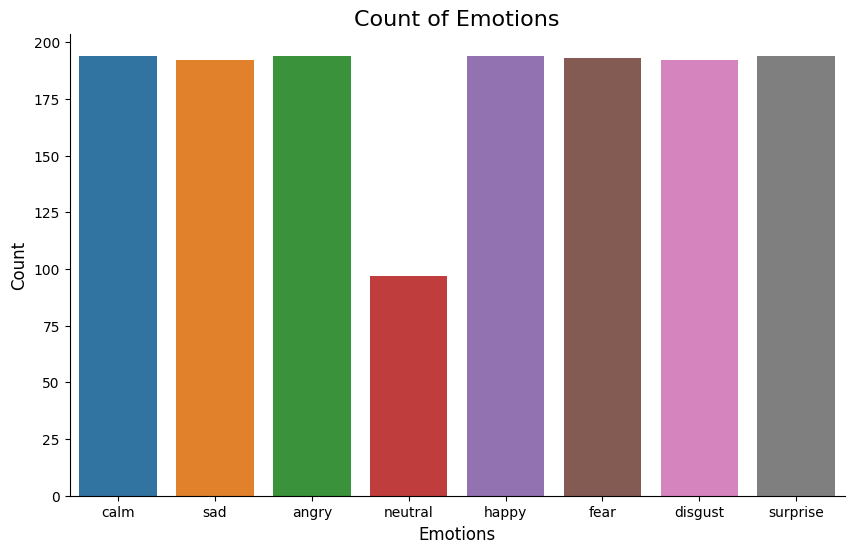

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the unique values in the 'Emotions' column
print("Unique Emotions:", Ravdess_df['Emotions'].unique())

# Plot countplot only if the DataFrame has data
if not Ravdess_df.empty:
    plt.figure(figsize=(10, 6))
    plt.title('Count of Emotions', size=16)
    sns.countplot(x='Emotions', data=Ravdess_df)
    plt.ylabel('Count', size=12)
    plt.xlabel('Emotions', size=12)
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.show()
else:
    print("DataFrame is empty. Please check your data.")


Here we have considered that the count generally counts the number of unique values in the data. In our case in the X axis we are having different types of emotions and  in the Y axis, We are having the count of each emotion so the count plot has plotted histograms for each emotion.

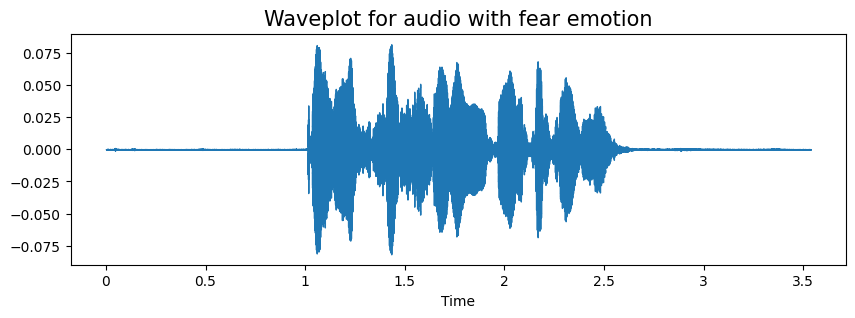

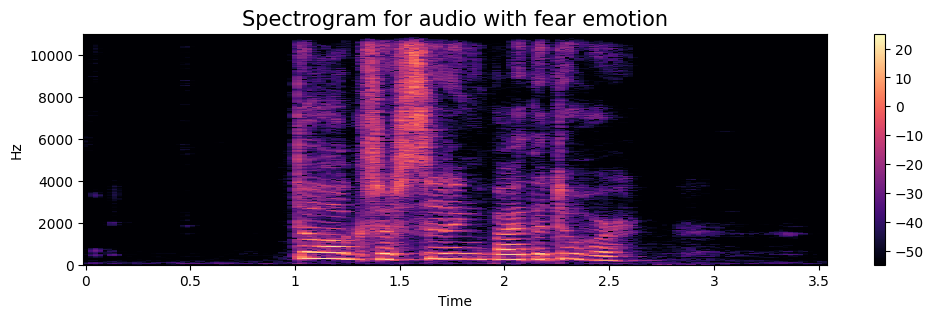

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


Wave plots are under a kind of visualization where it visualizes waves of the different audio files with different emotions like fear, sad. Happy, anger. Spectrogram are the visualization created using the frequency of the audio signal where different audio signals are having different frequencies and color in the image shows that spectrogram represents the amplitude of different frequencies at different points of time.



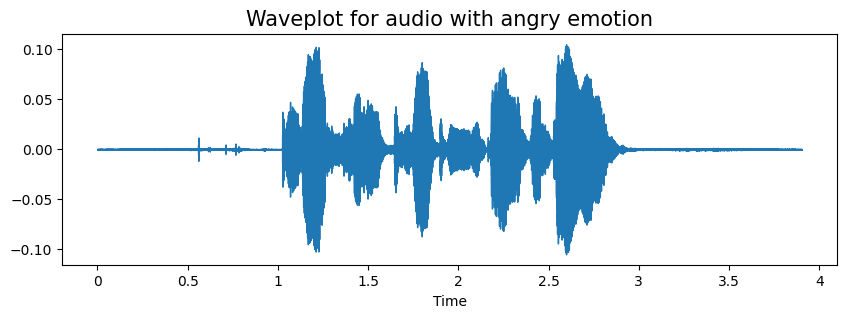

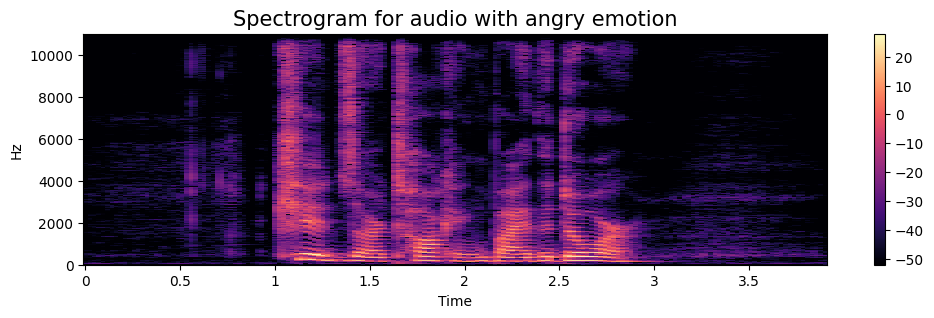

In [ ]:
# Set the target emotion for analysis
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


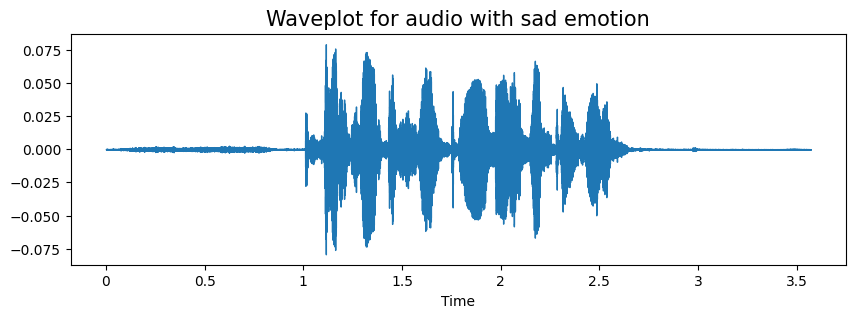

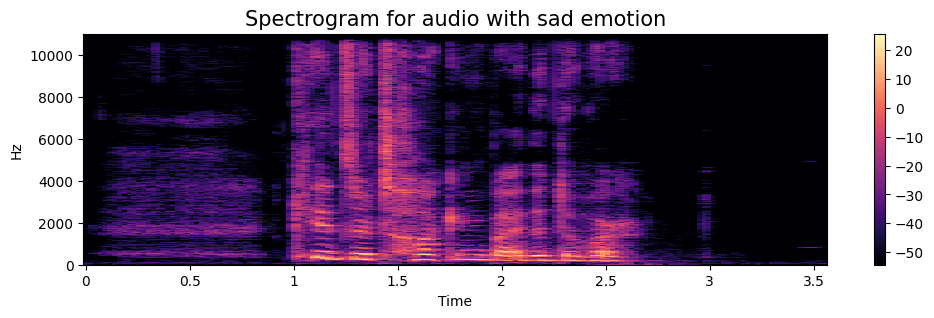

In [ ]:
# Set the target emotion for analysis
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


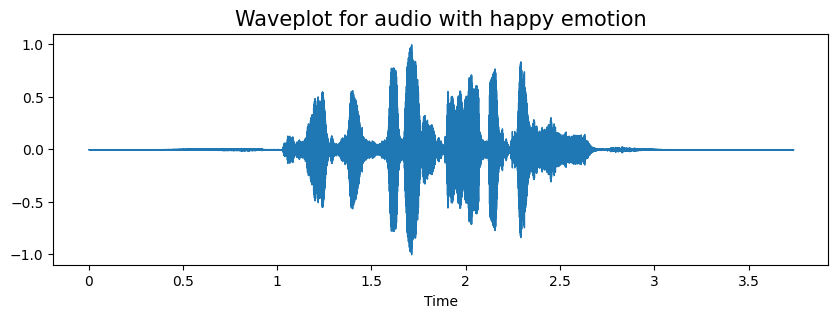

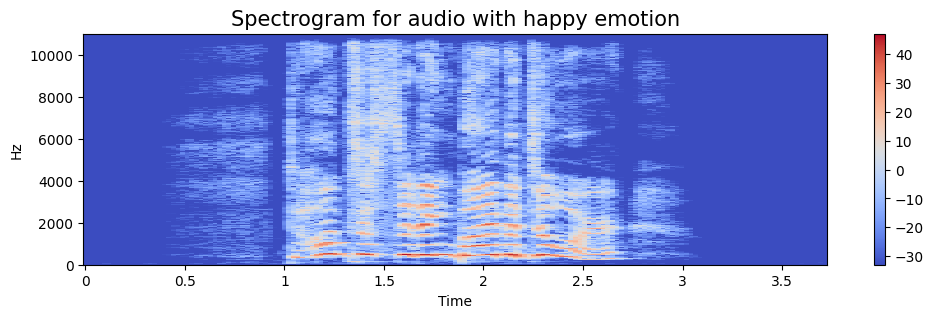

In [ ]:
# Set the target emotion for analysis
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions == emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


#Data Augmentation


In [ ]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

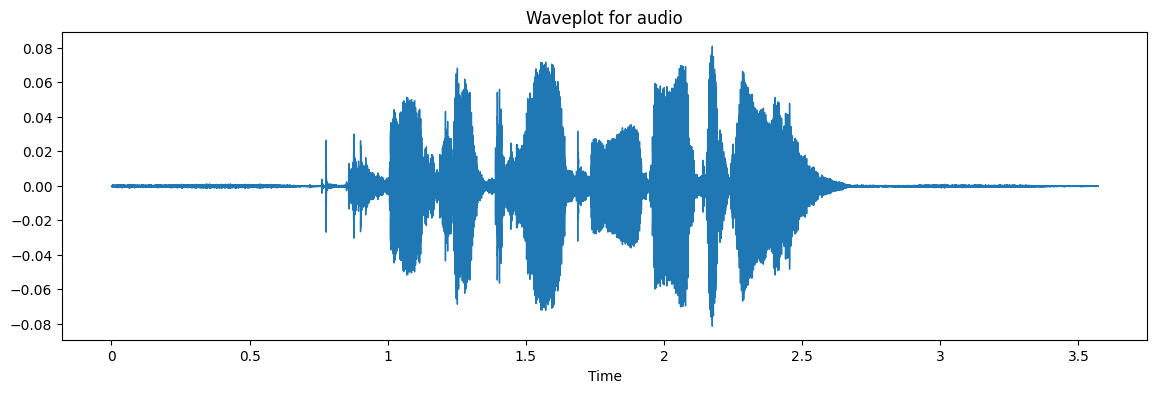

In [ ]:
# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

plt.figure(figsize=(14,4))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('Waveplot for audio')
plt.show()

Audio(path)

#Noise Injection

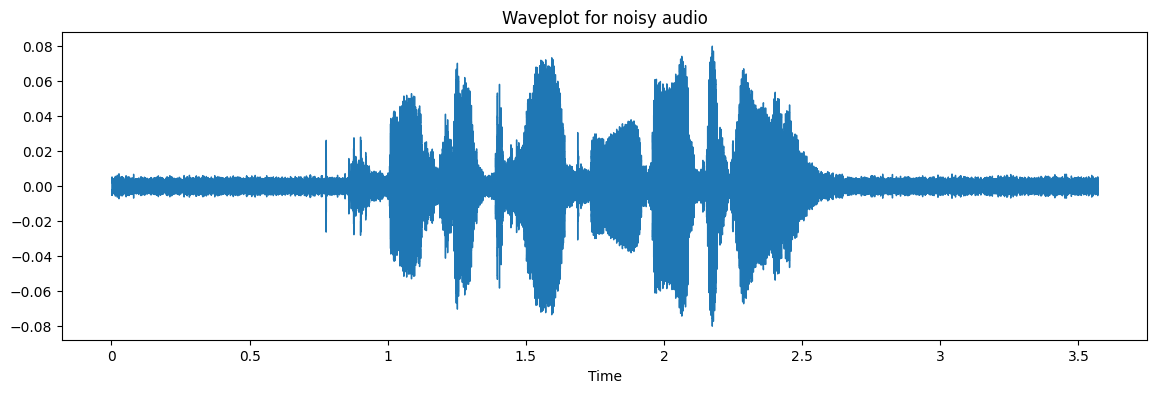

In [ ]:
# Generate noisy data
x = noise(data)

# Plot the waveplot of the noisy data
plt.figure(figsize=(14,4))
librosa.display.waveshow(x, sr=sample_rate)
plt.title('Waveplot for noisy audio')
plt.show()

# Play the noisy audio
Audio(x, rate=sample_rate)

Data argumentation data argumentation is one of the important step for creating different audios from the original audio. Suppose in this case we are considering noise injection noise injection is a mechanism where we add external random voice to the original audio so that the data is argued with the noise

#Stretching

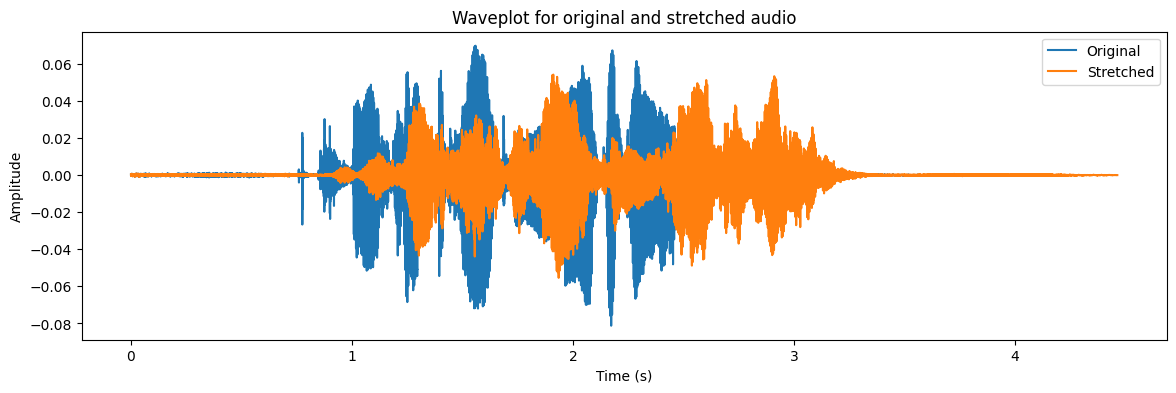

In [ ]:
# Apply time-stretching to the original audio signal
x = stretch(data)

# Plot the original and stretched waveforms
plt.figure(figsize=(14, 4))
plt.plot(np.arange(len(data)) / sample_rate, data, label='Original')
plt.plot(np.arange(len(x)) / sample_rate, x, label='Stretched')
plt.title('Waveplot for original and stretched audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Play the stretched audio
Audio(x, rate=sample_rate)



The other important data argumentation method is time stretching. This is also very important argumentation where it creates audios with different time. Duration is here will be stretching an audio for the different times without changing any pitch of the audio. For this one will be using a function called a stretch

#Shift

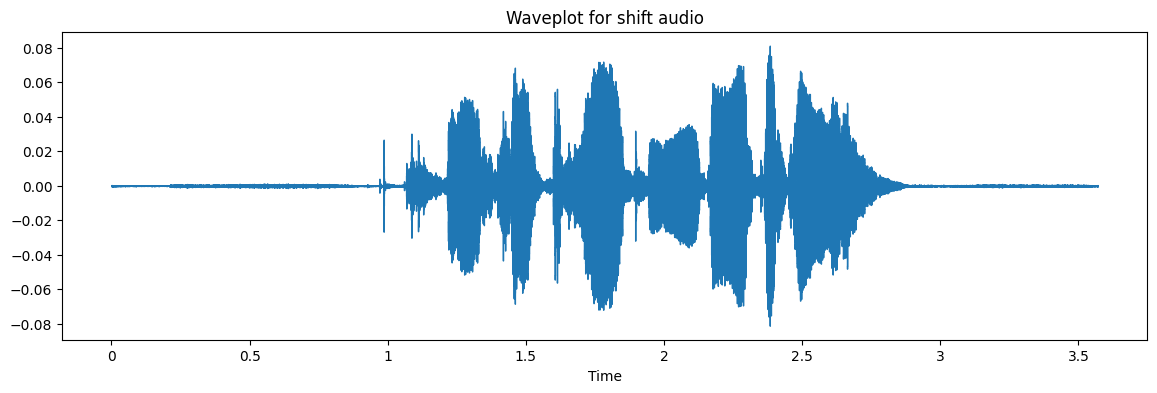

In [ ]:
x = shift(data)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot for shift audio')
plt.show()

# Play the stretched audio
Audio(x, rate=sample_rate)


The other important data argumentation method for audio files is shifting shift is a function which is used to create this data argumentation here this moves the audio signal along its axis. The axis which it moves is called time axis. It will be having different variations in the timing and thespeech data, it will be having different types and variations in the rhythm of the speech.


#Feature Extraction

In [ ]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = shift(data)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

#Data Preparation

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path.head(1000), data_path.Emotions.head(1000)):
    features = get_features(path)
    for ele in features:
        X.append(ele)
        # Appending emotion for each set of features
        Y.append(emotion)

# Convert the lists to numpy arrays
X = np.vstack(X)
Y = np.array(Y)

In [ ]:

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print("Unique emotions in Y:", np.unique(Y))


Shape of X: (3000, 162)
Shape of Y: (3000,)
Unique emotions in Y: ['angry' 'calm' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [ ]:
# Now you can proceed with creating the DataFrame and saving it to CSV
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.137700  0.575722  0.425141  0.368434  0.410353  0.453824  0.373584   
1  0.214613  0.612756  0.490767  0.459155  0.523398  0.515323  0.447199   
2  0.137302  0.463073  0.379549  0.390785  0.467263  0.393767  0.366381   
3  0.143419  0.497668  0.445364  0.501399  0.510469  0.526487  0.541189   
4  0.249525  0.571460  0.586836  0.602182  0.615716  0.633843  0.564404   

          7         8         9  ...       153       154       155       156  \
0  0.378462  0.478697  0.555857  ...  0.000653  0.000757  0.000821  0.000628   
1  0.470850  0.514020  0.611106  ...  0.000659  0.000769  0.000829  0.000637   
2  0.465738  0.528602  0.655923  ...  0.000653  0.000757  0.000821  0.000628   
3  0.534451  0.574191  0.575405  ...  0.000135  0.000309  0.000233  0.000307   
4  0.579997  0.600035  0.624176  ...  0.000375  0.000551  0.000459  0.000519   

        157       158       159       160       161  labels  
0  0.000753  0.000825  0.000725  0.000498  0.000075    calm  
1  0.000757  0.000830  0.000729  0.000508  0.000085    calm  
2  0.000753  0.000825  0.000725  0.000498  0.000075    calm  
3  0.000411  0.000281  0.000317  0.000184  0.000019    calm  
4  0.000667  0.000524  0.000576  0.000430  0.000263    calm  

[5 rows x 163 columns]

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2250, 162), (2250, 8), (750, 162), (750, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2250, 162), (2250, 8), (750, 162), (750, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2250, 162, 1), (2250, 8), (750, 162, 1), (750, 8))

#Modelling

In [ ]:
# Create a Sequential model
model = Sequential()

# First Convolutional layer with 256 filters, kernel size of 5, and ReLU activation
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))

#  MaxPooling layer with pool size 5, strides 2, and padding 'same'
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Second Convolutional layer with 256 filters, kernel size of 5, and ReLU activation
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))

#  MaxPooling layer with pool size 5, strides 2, and padding 'same'
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Third Convolutional layer with 128 filters, kernel size of 5, and ReLU activation
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))

#  MaxPooling layer with pool size 5, strides 2, and padding 'same'
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Dropout layer with dropout rate of 0.2 for regularization
model.add(Dropout(0.2))

# Fourth Convolutional layer with 64 filters, kernel size of 5, and ReLU activation
model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))

#  MaxPooling layer with pool size 5, strides 2, and padding 'same'
model.add(MaxPooling1D(pool_size=5, strides=2, padding='same'))

# Flatten the output for feeding into Dense layers
model.add(Flatten())

# Dense layer with 32 units and ReLU activation
model.add(Dense(units=32, activation='relu'))

#  Dropout layer with dropout rate of 0.3 for regularization
model.add(Dropout(0.3))

# Final Dense layer with 8 units (for 8 classes) and softmax activation for classification
model.add(Dense(units=8, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1  (None, 81, 256)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 21, 128)           0

In [ ]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
# Train the model
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
36/36 [==============================] - 19s 514ms/step - loss: 1.9406 - accuracy: 0.2440 - val_loss: 1.8615 - val_accuracy: 0.2960 - lr: 0.0010
Epoch 2/50
36/36 [==============================] - 15s 426ms/step - loss: 1.8906 - accuracy: 0.2498 - val_loss: 1.7955 - val_accuracy: 0.3347 - lr: 0.0010
Epoch 3/50
36/36 [==============================] - 16s 448ms/step - loss: 1.8286 - accuracy: 0.2818 - val_loss: 1.7162 - val_accuracy: 0.3720 - lr: 0.0010
Epoch 4/50
36/36 [==============================] - 15s 415ms/step - loss: 1.7735 - accuracy: 0.3111 - val_loss: 1.6401 - val_accuracy: 0.3867 - lr: 0.0010
Epoch 5/50
36/36 [==============================] - 13s 358ms/step - loss: 1.7182 - accuracy: 0.3342 - val_loss: 1.6738 - val_accuracy: 0.3640 - lr: 0.0010
Epoch 6/50
36/36 [==============================] - 14s 377ms/step - loss: 1.7071 - accuracy: 0.3422 - val_loss: 1.6027 - val_accuracy: 0.4107 - lr: 0.0010
Epoch 7/50
36/36 [==============================] - 15s 428ms/st

24/24 [==============================] - 1s 39ms/step - loss: 0.6662 - accuracy: 0.8120
Accuracy of our model on test data :  81.19999766349792 %


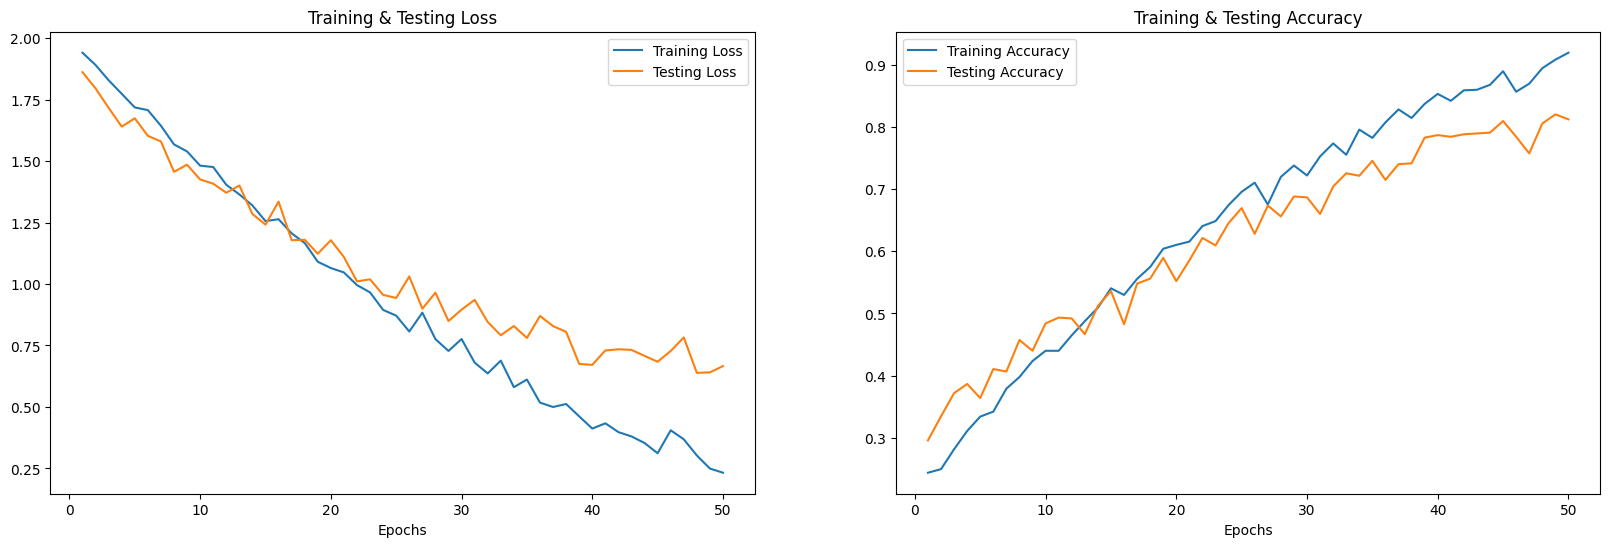

In [ ]:
print("Accuracy of our model on test data : ", model.evaluate(x_test, y_test)[1] * 100, "%")

epochs = range(1, 51)  # Adjust the range based on the number of epochs
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, test_loss, label='Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, test_acc, label='Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


SER Accuracy and Loss Graph



In [ ]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

24/24 [==============================] - 3s 136ms/step


In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

Predicted Labels Actual Labels
0              sad           sad
1          disgust       disgust
2         surprise      surprise
3             calm          calm
4             calm          calm
5            angry         angry
6            angry         angry
7             calm          calm
8             calm          calm
9              sad           sad

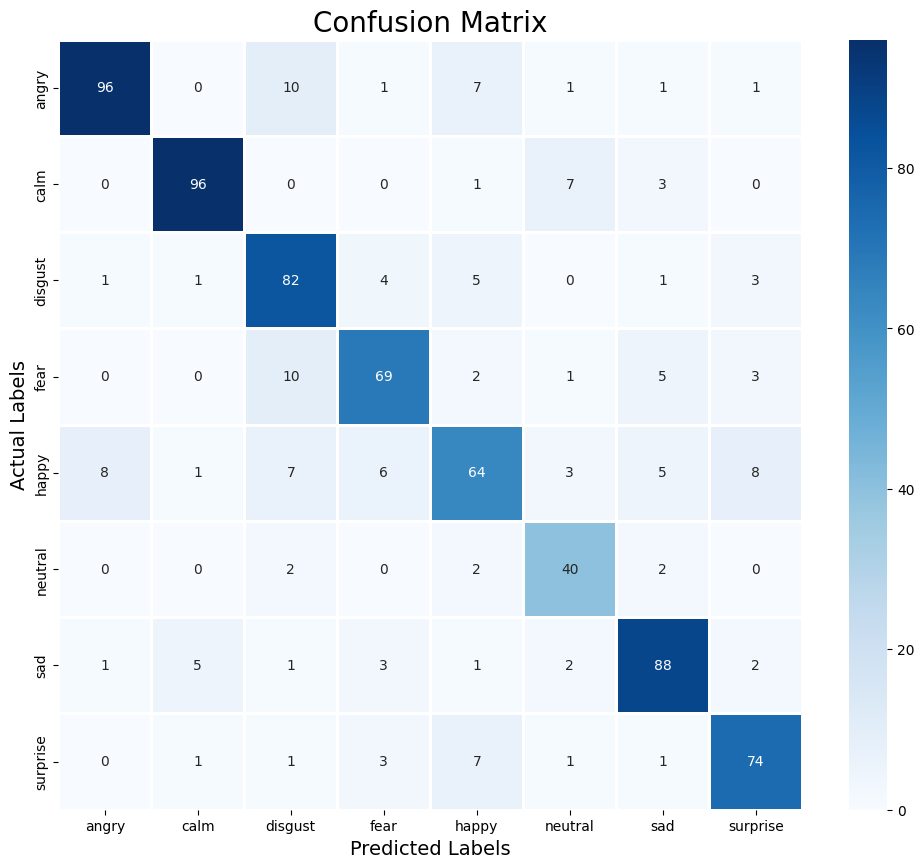

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.91      0.82      0.86       117
        calm       0.92      0.90      0.91       107
     disgust       0.73      0.85      0.78        97
        fear       0.80      0.77      0.78        90
       happy       0.72      0.63      0.67       102
     neutral       0.73      0.87      0.79        46
         sad       0.83      0.85      0.84       103
    surprise       0.81      0.84      0.83        88

    accuracy                           0.81       750
   macro avg       0.81      0.82      0.81       750
weighted avg       0.81      0.81      0.81       750



#Facial Emotion Recognition
#Load Dataset

In [34]:
# import Libraries
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Mount the drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import dataset
df = pd.read_csv('/content/drive/MyDrive/facial_dataset/fer2013.csv')
print(df.shape)
df.head()

(35887, 3)


emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [6]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [7]:
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}

In [8]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [9]:
import plotly.express as px

# Assuming df is your DataFrame with a column named 'emotion'
fig = px.bar(df['emotion'].value_counts(), x=df['emotion'].value_counts().index, y=df['emotion'].value_counts().values)

# Set plot labels
fig.update_layout(
    xaxis_title='Emotion',
    yaxis_title='Count',
    title='Countplot of Emotions'
)

# Show the plot in the notebook
fig.show('notebook')


In [11]:
import math

math.sqrt(len(df.pixels[0].split(' ')))

48.0

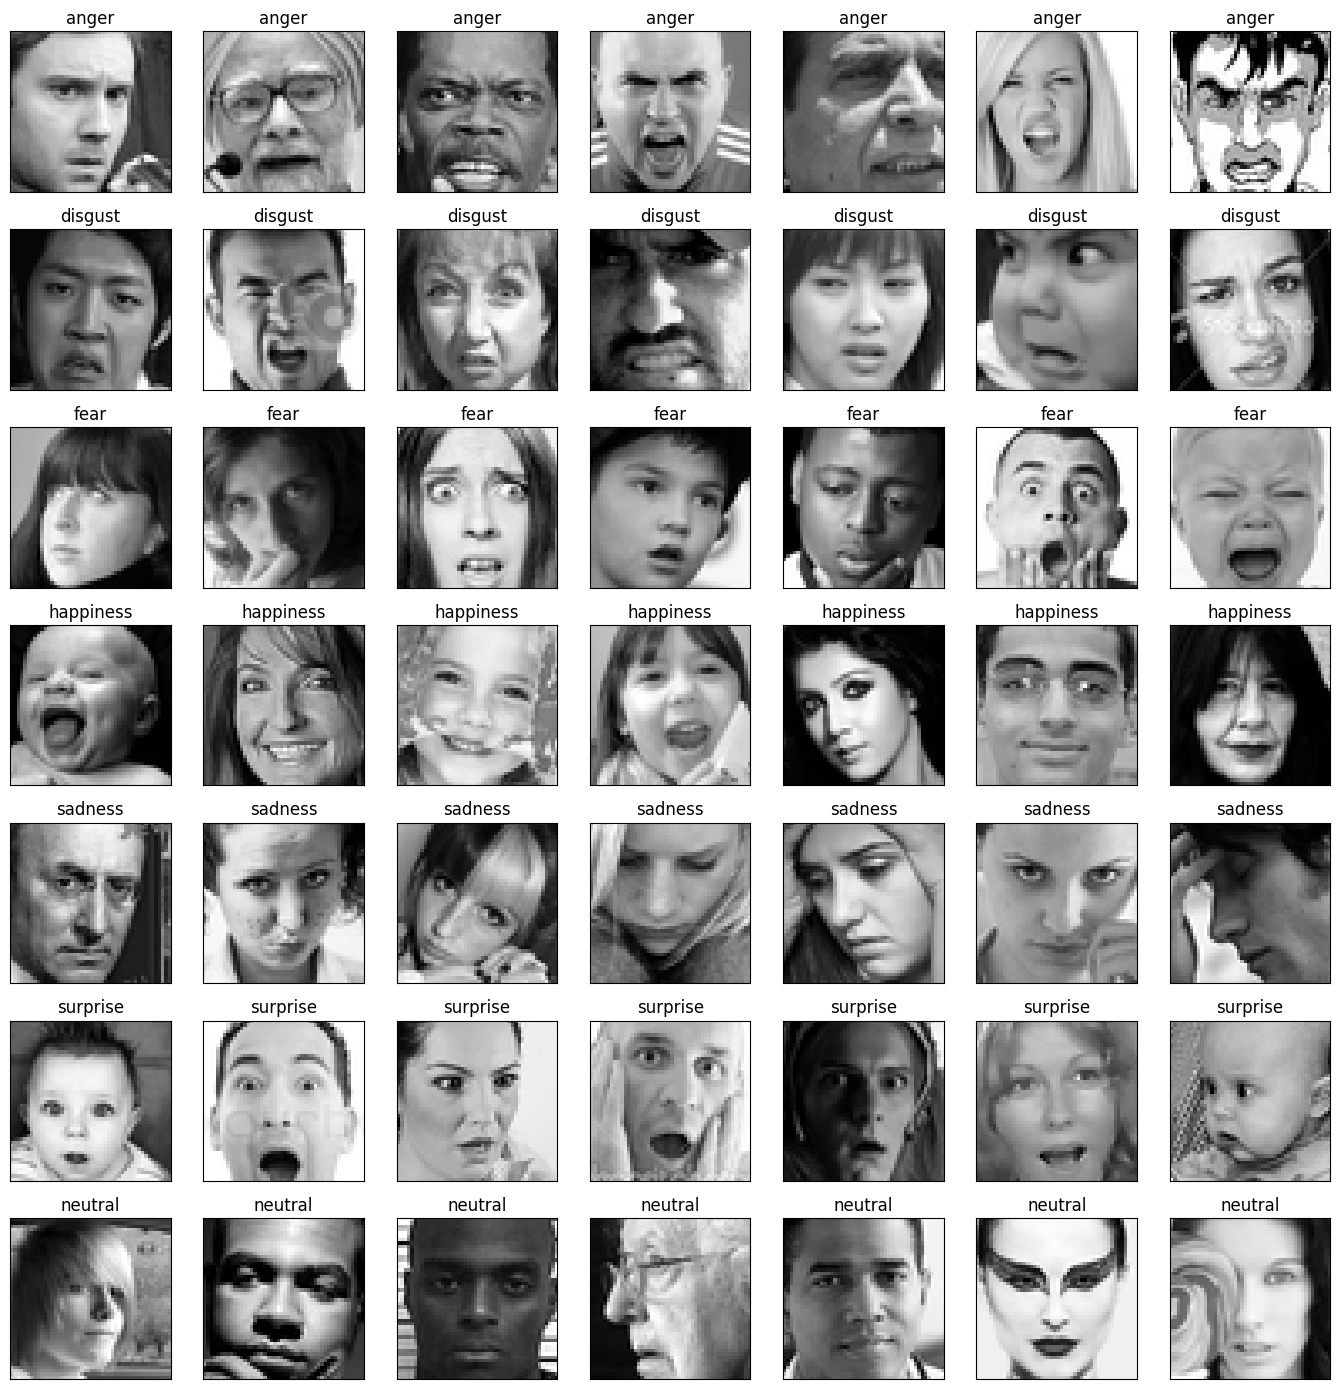

In [13]:
# Display all the emotions
import matplotlib.pyplot as pyplot
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

In [14]:
INTERESTED_LABELS = [3, 4, 6]

In [15]:
df = df[df.emotion.isin(INTERESTED_LABELS)]
df.shape

(21264, 3)

In [16]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))
img_array = np.stack(img_array, axis=0)

In [17]:
img_array.shape

(21264, 48, 48, 1)

#Data Preparation for Neural Network

In [18]:
# Use LabelEncoder for Data Preparation
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
img_labels = le.fit_transform(df.emotion)
img_labels = to_categorical(img_labels)



In [19]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3: 0, 4: 1, 6: 2}


In [20]:
# Split the Data
X_train, X_valid, y_train, y_valid = train_test_split(img_array, img_labels,
                                                    shuffle=True, stratify=img_labels,
                                                    test_size=0.1, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((19137, 48, 48, 1), (2127, 48, 48, 1), (19137, 3), (2127, 3))

In [21]:
del df
del img_array
del img_labels

In [22]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [23]:
# Normalizing results, as neural networks are very sensitive to unnormalized data.
X_train = X_train / 255.
X_valid = X_valid / 255.

In [ ]:
# Build the Network
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used `ELU` as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. `he_normal` kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name='DCNN')

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            input_shape=(img_width, img_height, img_depth),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_1'))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5,5),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_2'
        )
    )
    net.add(BatchNormalization(name='batchnorm_2'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
    net.add(Dropout(0.4, name='dropout_1'))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_3'
        )
    )
    net.add(BatchNormalization(name='batchnorm_3'))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_4'
        )
    )
    net.add(BatchNormalization(name='batchnorm_4'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
    net.add(Dropout(0.4, name='dropout_2'))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_5'
        )
    )
    net.add(BatchNormalization(name='batchnorm_5'))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3,3),
            activation='elu',
            padding='same',
            kernel_initializer='he_normal',
            name='conv2d_6'
        )
    )
    net.add(BatchNormalization(name='batchnorm_6'))

    net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
    net.add(Dropout(0.5, name='dropout_3'))

    net.add(Flatten(name='flatten'))

    net.add(
        Dense(
            128,
            activation='elu',
            kernel_initializer='he_normal',
            name='dense_1'
        )
    )
    net.add(BatchNormalization(name='batchnorm_7'))

    net.add(Dropout(0.6, name='dropout_4'))

    net.add(
        Dense(
            num_classes,
            activation='softmax',
            name='out_layer'
        )
    )

    net.compile(
        loss='categorical_crossentropy',
        optimizer=optim,
        metrics=['accuracy']
    )

    net.summary()

    return net

In [ ]:
"""
I used two callbacks one is `early stopping` for avoiding overfitting training data
and other `ReduceLROnPlateau` for learning rate.
"""

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
# As the data in hand is less as compared to the task so ImageDataGenerator is good to go.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [ ]:
batch_size = 32 #batch size of 32 performs the best.
epochs = 100
optims = [
    optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
    optimizers.Adam(0.001),
]

# I tried both `Nadam` and `Adam`, the difference in results is not different but I finally went with Nadam as it is more popular.
model = build_net(optims[1])
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / batch_size,
    epochs=epochs,
    callbacks=callbacks,
    use_multiprocessing=True
)

Model: "DCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        1664      
                                                                 
 batchnorm_1 (BatchNormaliz  (None, 48, 48, 64)        256       
 ation)                                                          
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batchnorm_2 (BatchNormaliz  (None, 48, 48, 64)        256       
 ation)                                                          
                                                                 
 maxpool2d_1 (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0      

<ipython-input-29-b39dcc308b2a>:10: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



598/598 [==============================] - 34s 40ms/step - loss: 1.3580 - accuracy: 0.3956 - val_loss: 1.0200 - val_accuracy: 0.4753 - lr: 0.0010
Epoch 2/100
598/598 [==============================] - 22s 36ms/step - loss: 1.0348 - accuracy: 0.4783 - val_loss: 0.8790 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 3/100
598/598 [==============================] - 21s 35ms/step - loss: 0.9502 - accuracy: 0.5363 - val_loss: 0.8380 - val_accuracy: 0.6004 - lr: 0.0010
Epoch 4/100
598/598 [==============================] - 21s 36ms/step - loss: 0.8354 - accuracy: 0.5963 - val_loss: 0.7321 - val_accuracy: 0.6563 - lr: 0.0010
Epoch 5/100
598/598 [==============================] - 21s 35ms/step - loss: 0.7645 - accuracy: 0.6434 - val_loss: 0.7114 - val_accuracy: 0.6648 - lr: 0.0010
Epoch 6/100
598/598 [==============================] - 23s 38ms/step - loss: 0.7323 - accuracy: 0.6667 - val_loss: 0.6551 - val_accuracy: 0.6996 - lr: 0.0010
Epoch 7/100
598/598 [==============================] - 22s 36ms/

In [ ]:
from keras.models import model_from_json

# Save model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


# Save weights to HDF5 file
model.save_weights("model_weights.h5")



In [ ]:
print(history.history)


{'loss': [1.3579909801483154, 1.034818172454834, 0.950221061706543, 0.8353747129440308, 0.7644673585891724, 0.7322514653205872, 0.6984402537345886, 0.6757622957229614, 0.659818708896637, 0.6373088359832764, 0.628572404384613, 0.6080014109611511, 0.6003901958465576, 0.5942155718803406, 0.5852398872375488, 0.5840898752212524, 0.5689429640769958, 0.567230761051178, 0.5552017092704773, 0.5523229837417603, 0.5471419095993042, 0.5418737530708313, 0.5427656769752502, 0.5357910394668579, 0.5295267105102539, 0.525053083896637, 0.5167326331138611, 0.5118809342384338, 0.5108851790428162, 0.5129988789558411, 0.49928781390190125, 0.4870423972606659, 0.4785192906856537, 0.480989009141922, 0.4734761416912079, 0.4695117175579071, 0.4675948917865753, 0.4643543064594269, 0.4581042528152466, 0.45434069633483887, 0.46369680762290955, 0.45056426525115967, 0.45485782623291016, 0.4491138458251953, 0.44384706020355225, 0.43481653928756714, 0.43236514925956726, 0.43236151337623596, 0.42800578474998474], 'accur

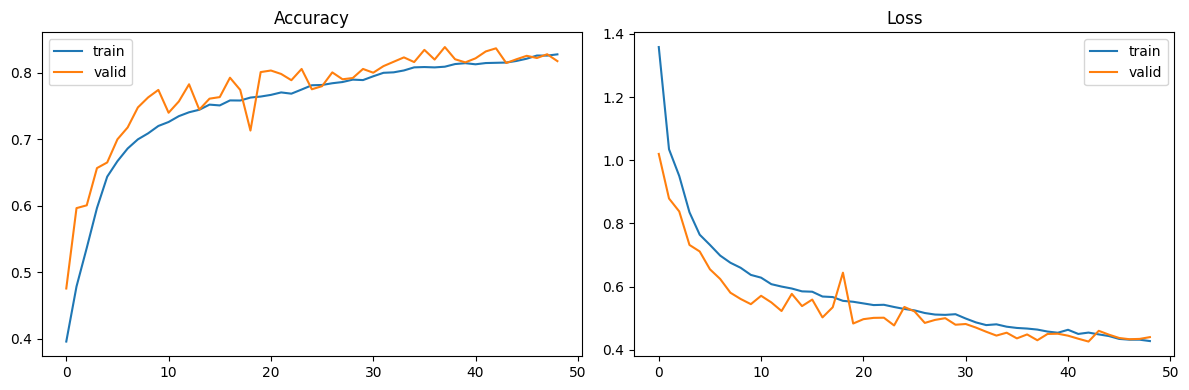

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, history.history['accuracy'], label='train')
plt.plot(history.epoch, history.history['val_accuracy'], label='valid')
plt.title('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.epoch, history.history['loss'], label='train')
plt.plot(history.epoch, history.history['val_loss'], label='valid')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('epoch_history_dcnn.png')
plt.show()


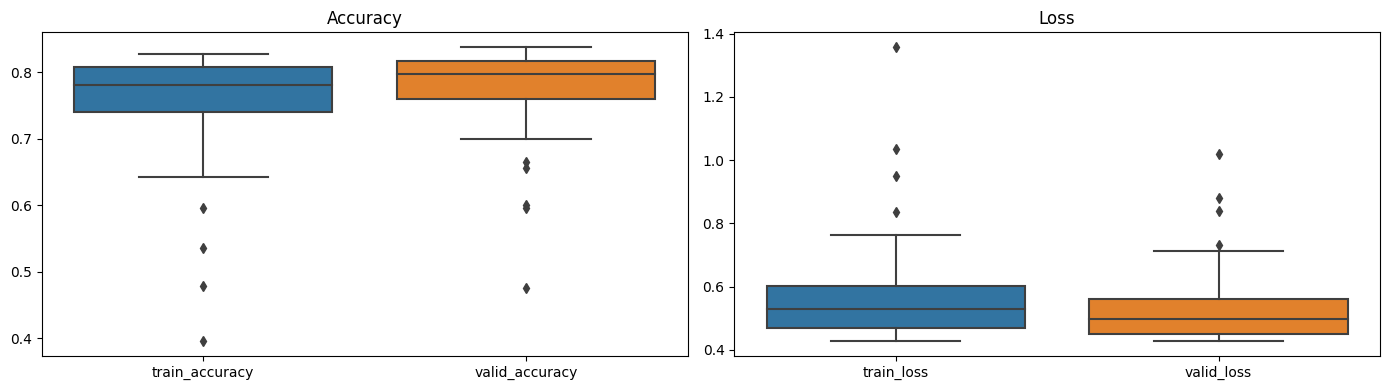

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the 'history' object

# Create DataFrames for accuracy and loss
df_accu = pd.DataFrame({'train_accuracy': history.history['accuracy'], 'valid_accuracy': history.history['val_accuracy']})
df_loss = pd.DataFrame({'train_loss': history.history['loss'], 'valid_loss': history.history['val_loss']})

# Create box plots using seaborn
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(data=df_accu, ax=axes[0])
sns.boxplot(data=df_loss, ax=axes[1])

axes[0].set_title('Accuracy')
axes[1].set_title('Loss')

plt.tight_layout()
plt.savefig('performance_dist.png')
plt.show()


In [ ]:
history

67/67 [==============================] - 1s 8ms/step
total wrong validation predictions: 344




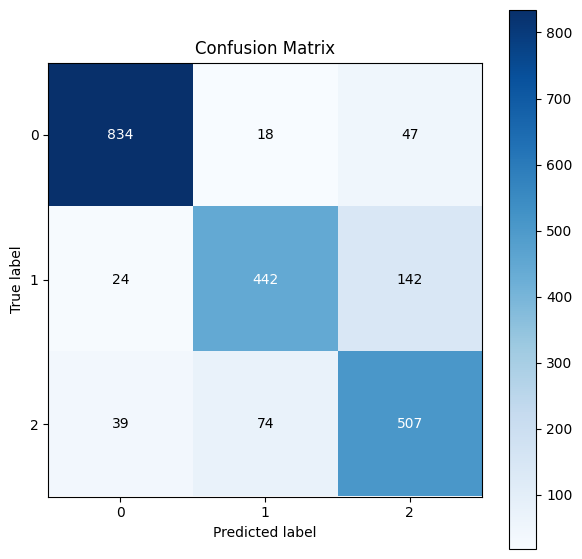

In [ ]:
yhat_valid_probs = model.predict(X_valid)
yhat_valid = np.argmax(yhat_valid_probs, axis=1)

# Now you can proceed with the rest of your code, e.g., plotting the confusion matrix
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_valid, axis=1), yhat_valid, figsize=(7, 7))
plt.savefig("confusion_matrix_dcnn.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n')


In [ ]:
from sklearn.metrics import classification_report

y_true = np.argmax(y_valid, axis=1)
print(classification_report(y_true, yhat_valid))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       899
           1       0.83      0.73      0.77       608
           2       0.73      0.82      0.77       620

    accuracy                           0.84      2127
   macro avg       0.83      0.82      0.82      2127
weighted avg       0.84      0.84      0.84      2127



In [ ]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

1/1 [==============================] - 0s 20ms/step


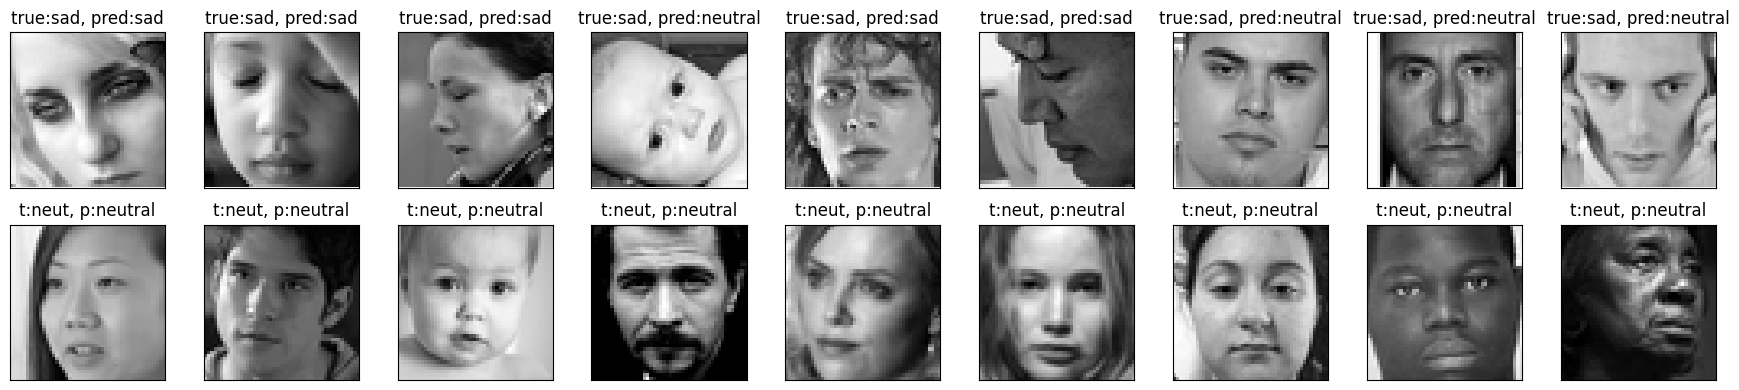

In [ ]:
# Prediction and compare actual and predicted values

np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1] == 1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2] == 1)[0], size=9)

fig = pyplot.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
    ax = pyplot.subplot(2, 9, i + 1)
    sample_img = X_valid[sadidx, :, :, 0]
    ax.imshow(sample_img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_class = np.argmax(model.predict(sample_img.reshape(1, 48, 48, 1)))
    ax.set_title(f"true:sad, pred:{mapper[predicted_class]}")

    ax = pyplot.subplot(2, 9, i + 10)
    sample_img = X_valid[neuidx, :, :, 0]
    ax.imshow(sample_img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_class = np.argmax(model.predict(sample_img.reshape(1, 48, 48, 1)))
    ax.set_title(f"t:neut, p:{mapper[predicted_class]}")

    pyplot.tight_layout()
